In [5]:
#Intial Creation: Jared W. Marquis
#Inital Author: "Jared W. Marquis"
#Creation Date: 01 August 2022
#Course: ATSC 528 - Atmospheric Data Analysis
#Assignment: #04 - Chaos

#Written: Christian M Nairy <christian.nairy@und.edu>

#Main Purpose: Script to examine how chaos manifests in a simple model.

##### FIRST STEP ##### 
# - Define the constants as seen in the lab
##### SECOND STEP #####
# - Define the function (time_eqn).
# - This consists of the 3 ODE's along with the time step for x, y, and z (defined in the lab).

##### THIRD STEP #####
# - The first thing we do is create empty lists to store the data from the simulations.
# - Total of two simulations performed.
# - 720 represents (6 timesteps in a day * 120 days) - thus x-axis for the plot will be to 120.
# - We then have to loop through, and then save the x, y, and z component separately for each simulation.
# - The first simulation has initial conditions of (2.5, 1.0, 0 - defined in lab) and the second simulation has initial conditions of (2.49, 1.0, 0 - defined in lab).
# - We are measureing/observing how different the model outputs can/will change during the each run, by just changing small inputs.

##### FOURTH STEP -- OUTPUTS #####
# - Plot each simulation separately (X, Y, & Z) and then show both X, Y, and Z (merged) for each simulation in order for easy comparisions.
# - Total of 12 plots will be generated by the end of the script.



In [2]:
#Imports
import numpy as np                    
import matplotlib.pyplot as plt       
import cartopy.crs as ccrs            
import cartopy.feature as cfeature   

In [3]:
#Define the constants (in lab)
a = 0.25
b = 4.0
F = 8.0
G = 1.0
time = (4/(24*5))

In [12]:
#Define the equations (put into a function)
#Lorenz
def time_eqn(x,y,z):
    
    """
    Created by Lorenz(1984, 1990, 2006)
    "x" represents the strength of a circumpolar westerly current
    "y" and "z" denote the cosine and sine phases of a superposed chain of large-scale waves
    "t" is a normalized time such that 1 normalized time unit equals 5 days
    "a", "b", "F", and "G" are constants
    """
    dx = (-(y**2) - (z**2) - (a*x) + (a*F))
    time_step_x = x + (time*(dx))
    
    dy = ((x*y) - (b*x*z) - y + G)
    time_step_y = y + (time*(dy))
    
    dz = ((b*x*y) + (x*z) - z)
    time_step_z = z + (time*(dz))
    
    return ([time_step_x, time_step_y, time_step_z]) #making it into a list

In [34]:
#This is for Simulation #1
first_cond_x = np.empty([720])
first_cond_y = np.empty([720])
first_cond_z = np.empty([720])

#Set the first values in each list to the first set of initial conditions
first_cond_x[0] = 2.5
first_cond_y[0] = 1.0
first_cond_z[0] = 0.0

#Generate a loop that will start from 1 and go until 720
for i in range(1, 720):
    run = time_eqn(first_cond_x[i-1], first_cond_y[i-1], first_cond_z[i-1]) #plug into the function defined above
    first_cond_x[i] = run[0] #just the x
    first_cond_y[i] = run[1] #just the y
    first_cond_z[i] = run[2] #just the z

#normalize time
Time = np.arange(0,120,(1/6))

720


Text(0.5, 1.0, 'Sim #1 [X]')

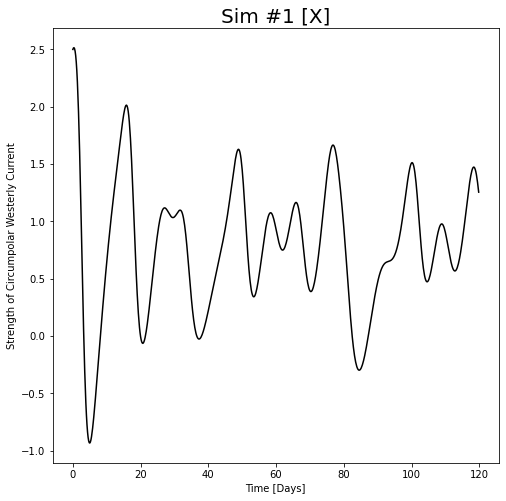

In [63]:
#Plot the first set of initial conditions (X)
fig = plt.figure(figsize=(8,8))
plt.plot(Time,first_cond_x, color = 'k')
plt.ylabel("Strength of Circumpolar Westerly Current")
plt.xlabel("Time [Days]")
plt.title("Sim #1 [X]",fontsize=20)

Text(0.5, 1.0, 'Sim #1 [Y]')

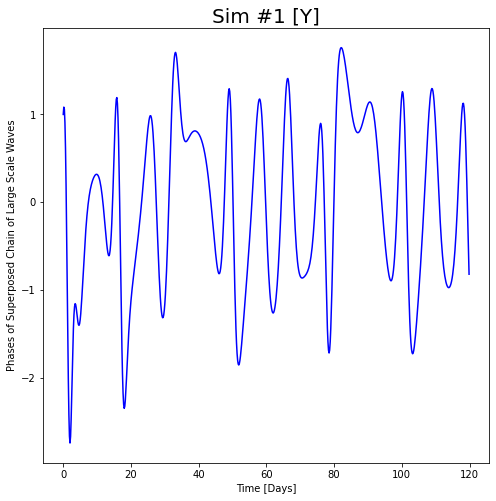

In [64]:
#Plot the first set of initial conditions (Y)
fig = plt.figure(figsize=(8,8))
plt.plot(Time,first_cond_y, color = 'blue')
plt.ylabel("Phases of Superposed Chain of Large Scale Waves")
plt.xlabel("Time [Days]")
plt.title("Sim #1 [Y]",fontsize=20)

Text(0.5, 1.0, 'Sim #1 (Z)')

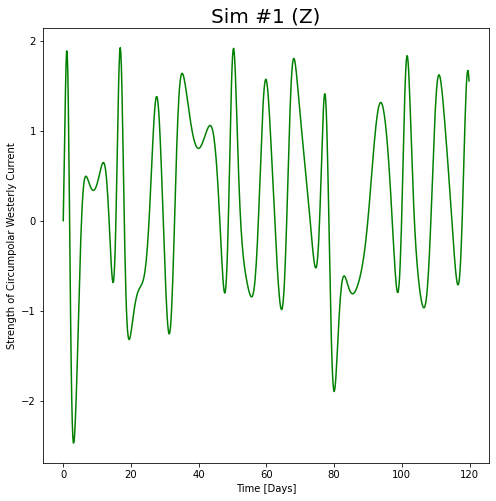

In [65]:
#Plot the first set of initial conditions (Z)
fig = plt.figure(figsize=(8,8))
plt.plot(Time,first_cond_z, color = 'green')
plt.ylabel("Strength of Circumpolar Westerly Current")
plt.xlabel("Time [Days]")
plt.title("Sim #1 (Z)",fontsize=20)

In [39]:
#Doing the same process as above, just for the second simulation

#This is for Simulation #2
second_cond_x = np.empty([720])
second_cond_y = np.empty([720])
second_cond_z = np.empty([720])

#Set the first values in each list to the 2nd set of initial conditions
second_cond_x[0] = 2.49
second_cond_y[0] = 1.0
second_cond_z[0] = 0.0

#Generate a loop that will start from 1 and go until 720
for i in range(1, 720):
    run_2 = time_eqn(second_cond_x[i-1], second_cond_y[i-1], second_cond_z[i-1])
    second_cond_x[i] = run_2[0]
    second_cond_y[i] = run_2[1]
    second_cond_z[i] = run_2[2]

Text(0.5, 1.0, 'Sim #2 (X)')

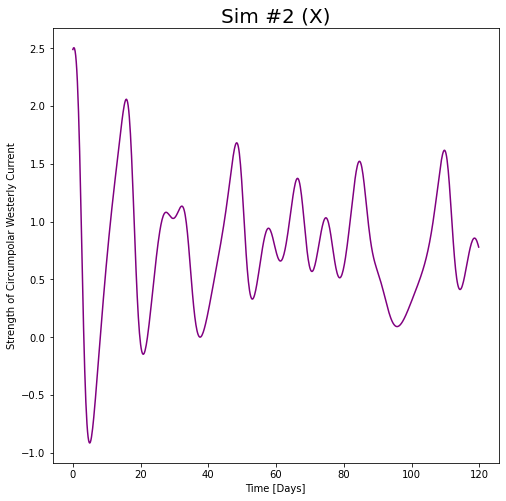

In [66]:
#Plot the second set of initial conditions (X)
fig = plt.figure(figsize=(8,8))
plt.plot(Time, second_cond_x, color = 'purple')
plt.ylabel("Strength of Circumpolar Westerly Current")
plt.xlabel("Time [Days]")
plt.title("Sim #2 (X)" ,fontsize=20)

Text(0.5, 1.0, 'Sim #2 (Y)')

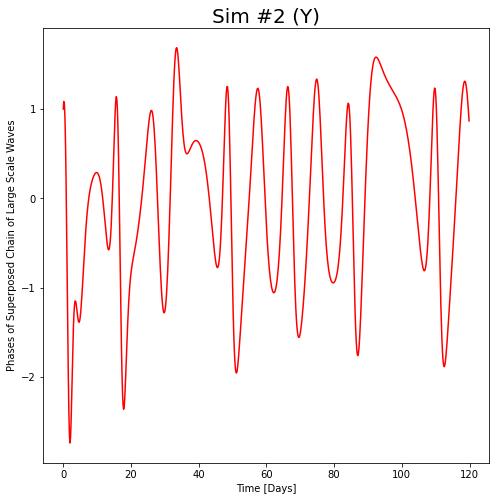

In [67]:
#Plot the second set of initial conditions (Y)
fig = plt.figure(figsize=(8,8))
plt.plot(Time, second_cond_y[:], color = 'red')
plt.ylabel("Phases of Superposed Chain of Large Scale Waves")
plt.xlabel("Time [Days]")
plt.title("Sim #2 (Y)",fontsize=20)

Text(0.5, 1.0, 'Sim #2 (Z)')

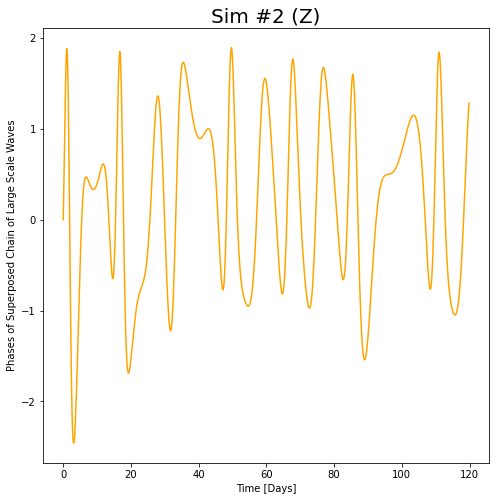

In [68]:
#Plot the second set of initial conditions (Z)
fig = plt.figure(figsize=(8,8))
plt.plot(Time, second_cond_z[:], color = 'orange')
plt.ylabel("Phases of Superposed Chain of Large Scale Waves")
plt.xlabel("Time [Days]")
plt.title("Sim #2 (Z)",fontsize=20)

Text(0.5, 0, 'Time [Days]')

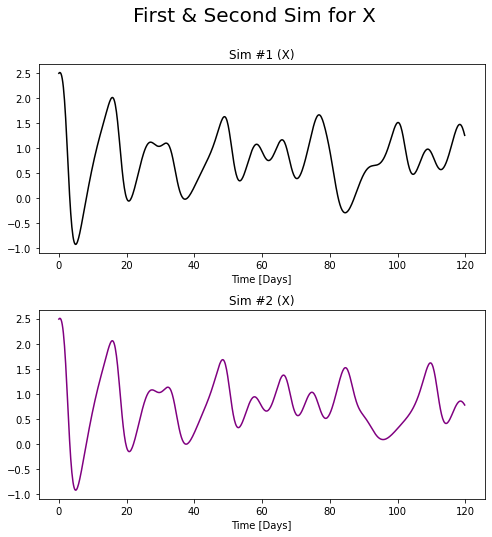

In [54]:
#Create subplots for X first and second simulations
fig, axs = plt.subplots(2,figsize=(8,8))
plt.subplots_adjust(hspace=0.3)
fig.suptitle('First & Second Sim for X',fontsize=20)
axs[0].plot(Time, first_cond_x[:], color = 'k')
axs[0].set_title('Sim #1 (X)')
axs[0].set_xlabel('Time [Days]')
axs[1].plot(Time, second_cond_x[:], color = 'purple')
axs[1].set_title('Sim #2 (X)')
axs[1].set_xlabel('Time [Days]')

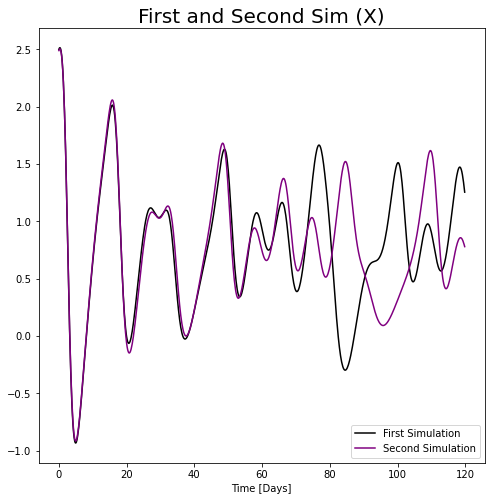

In [56]:
#Plot both first and second simulation (X) together on one plot
fig = plt.figure(figsize=(8,8))
plt.plot(Time, first_cond_x[:], color = 'k', label = 'First Simulation')
plt.plot(Time, second_cond_x[:], color = 'purple', label = 'Second Simulation')
plt.xlabel("Time [Days]")
plt.title("First and Second Sim (X)", fontsize=20)
plt.legend(loc = 'lower right')

Text(0.5, 0, 'Time [Days]')

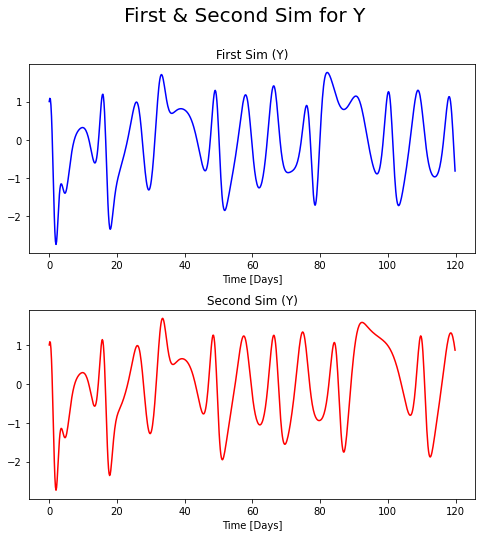

In [58]:
#Create subplots for y first and second conditions
fig, axs = plt.subplots(2, figsize=(8,8))
plt.subplots_adjust(hspace=0.3)
fig.suptitle('First & Second Sim for Y', fontsize=20)
axs[0].plot(Time, first_cond_y[:], color = 'blue')
axs[0].set_title('First Sim (Y)')
axs[0].set_xlabel('Time [Days]')
axs[1].plot(Time, second_cond_y[:], color = 'red')
axs[1].set_title('Second Sim (Y)')
axs[1].set_xlabel('Time [Days]')

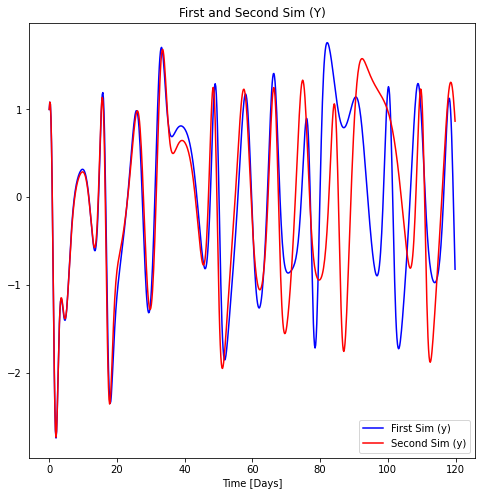

In [59]:
#Plot both first and second simulation (Y) together on one plot
fig = plt.figure(figsize=(8,8))
plt.plot(Time, first_cond_y[:], color = 'blue', label = 'First Sim (y)')
plt.plot(Time, second_cond_y[:], color = 'red', label = 'Second Sim (y)')
plt.xlabel("Time [Days]")
plt.title("First and Second Sim (Y)")
plt.legend(loc = 'lower right')

Text(0.5, 0, 'Time [Days]')

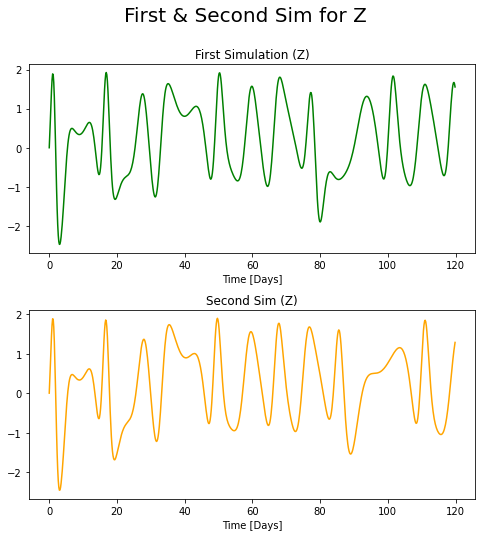

In [61]:
#Create subplots for Z first and second conditions
fig, axs = plt.subplots(2, figsize=(8,8))
plt.subplots_adjust(hspace=0.3)
fig.suptitle('First & Second Sim for Z', fontsize=20)
axs[0].plot(Time, first_cond_z[:], color = 'green')
axs[0].set_title('First Simulation (Z)')
axs[0].set_xlabel('Time [Days]')
axs[1].plot(Time, second_cond_z[:], color = 'orange')
axs[1].set_title('Second Sim (Z)')
axs[1].set_xlabel('Time [Days]')

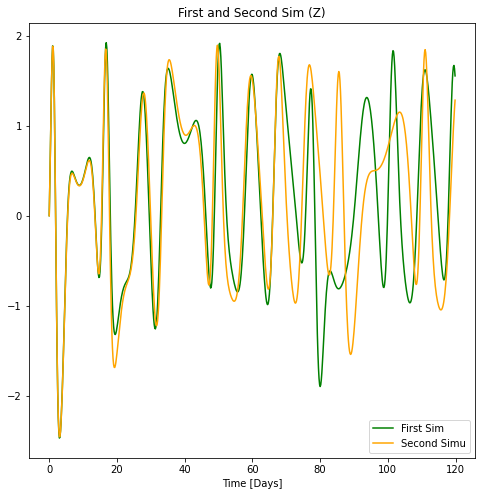

In [62]:
#Plot both first and second simulation (Z) together on one plot
fig = plt.figure(figsize=(8,8))
plt.plot(Time, first_cond_z[:], color = 'green', label = 'First Sim')
plt.plot(Time, second_cond_z[:], color = 'orange', label = 'Second Simu')
plt.xlabel("Time [Days]")
plt.title("First and Second Sim (Z)")
plt.legend(loc = 'lower right')

In [108]:
#In a separte text file (or below), provide a discussion of your results
#Make sure to answer the following questions in your discussion       

#1 - Are the two simulations the same throughout the entire period? If not, when do they diverge? 
"""
ANSWER: Both simulations arent the same throughout the entire period.

For the x component, a slight divergence begins around 320 days and then keeps diverging. The greatest swings in differences is when the first simulation at 500 days is in the
negatives (around -0.5), and then the second simulation at the same point is positive 1.5. Towards the end of the simulation around 700 days, the simulations get a bit closer, but
they are still different.

For the y component, the first divergence occurs around 200 days, but then matches up again from around 250 days through around 400 days. After the 400 day mark, the simulations
start to go in opposite phases (one negative and one positive), with the most concerning part around 515 days.

For the z component, a slight divergence occurs around 100 days, and then the simulations are almost the same after that up until around 400 days. A very large divergence 
occurs around the 480 day period, where each simulation is in a different phase. After the 600 day point, each simulation tries to match up wtih each other, and starts to look
more alike until the end.

"""

#2 - If the ending points are different, what does this say regarding the importance of providing NWP models, assuming this serves as a proxy for one, with 
#accurate and balanced initial conditions?

"""
From simulation one to simulation two, we only changed the x component by 0.1. Although this was a small change, all of the components in each simulation changed greatly.
Based on the results above, if we do not start with perfect results, or if something is changed ever so slightly, it can greatly change the results as the run progresses.
Having accurate initial conditions with the proper values can drastically change your final result, making it not what you expect, and can also bring the wrong result.
You need to start with everything properly, or else the model will go crazy. I like to think about this in terms of the GFS and when you go out very far, and then the model
is going a little crazy.